#### About
1. Image pyramids are used to represent an image at multiple resolutions to ensure that a ROI doesn't go undetected at one resolution which may get easily detected at other resolution.
2. They are mostly used when ROI contains both large and small objects..
3. Two most common form of image pyramids are - Gaussian and Laplacian image pyramids.
4. cv2.pyrDown and pyrUp are used to create most basic form of image pyramids.
5. Constructing an image pyramid is equivalent to performing repeated smoothing and subsampling.
6. Gaussian pyramid involves application of repeated gaussian blurring and downsampling an image until some stopping criterion.
7. Laplacian uses high pass filter in its backend hence yields edge image as output at each level of the pyramid.
8. Laplacian of a level is obtained by substracting that level in Gaussian pyramid and expanded version of its upper level in gaussian pyramid.
9. Laplacian pyramids are mostly used for image compression.
10. Image pyramids are mostly used for image blending and enhancement purposes.

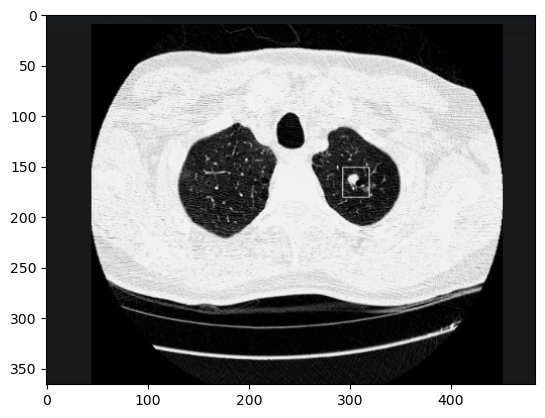

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

img = cv2.imread('image.png')
disp_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(disp_img)
plt.show()

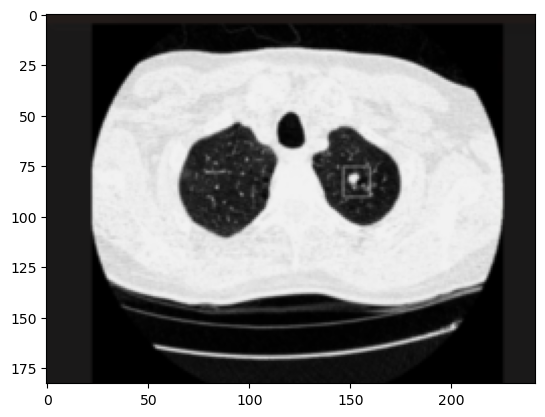

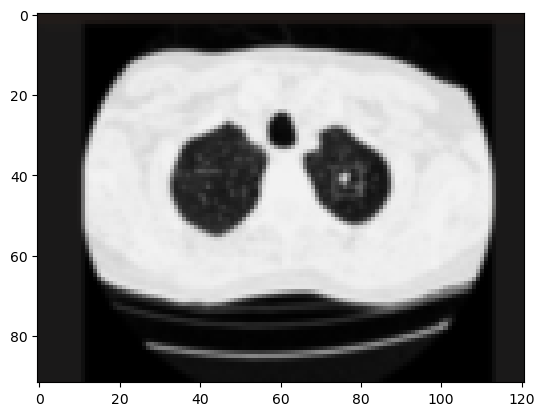

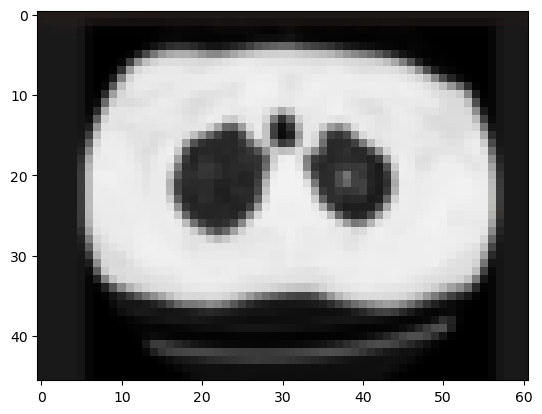

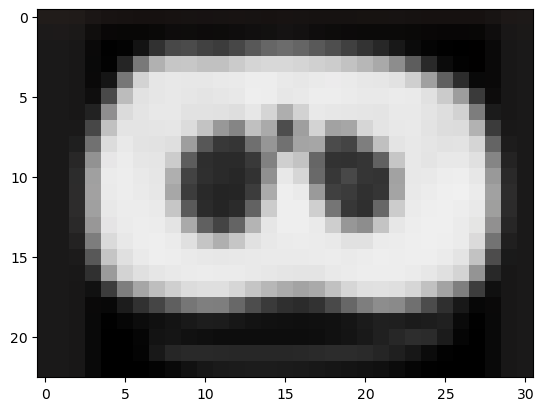

In [5]:
#down pyramid
img_1 = img.copy()
pyramid = [img_1]

for i in range(4):
    img_1 = cv2.pyrDown(img_1)
    pyramid.append(img_1)
    plt.imshow(img_1)
    plt.show()

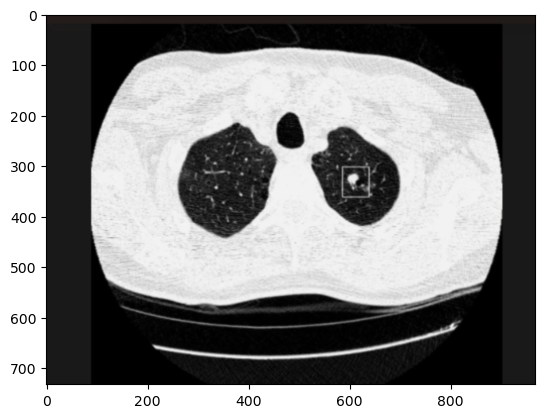

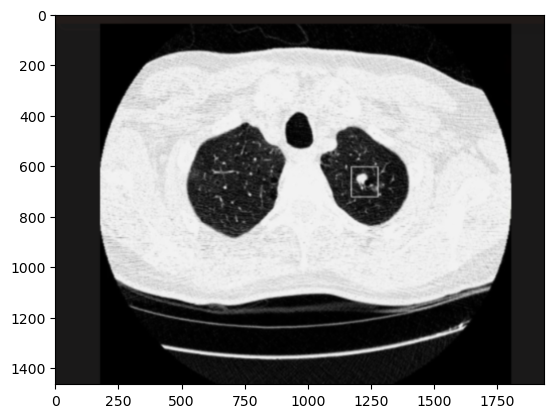

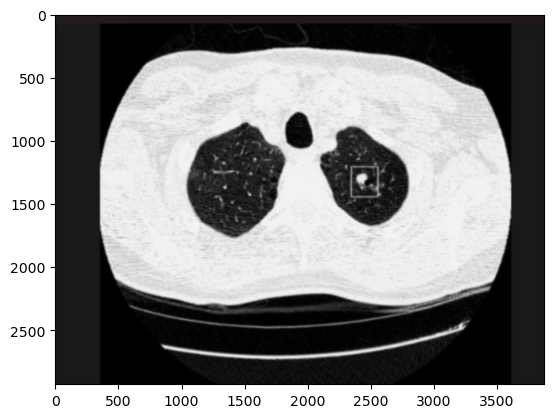

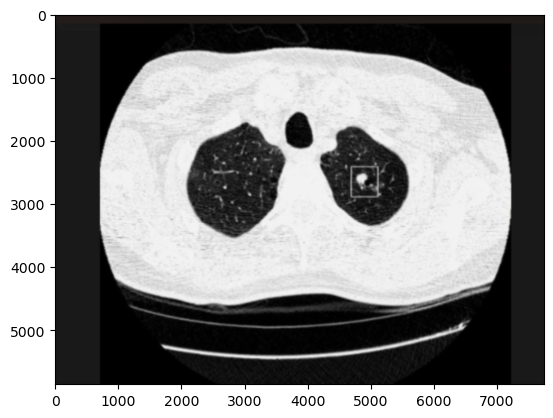

In [6]:
#up pyramid
img_1 = img.copy()
pyramid = [img_1]

for i in range(4):
    img_1 = cv2.pyrUp(img_1)
    pyramid.append(img_1)
    plt.imshow(img_1)
    plt.show()

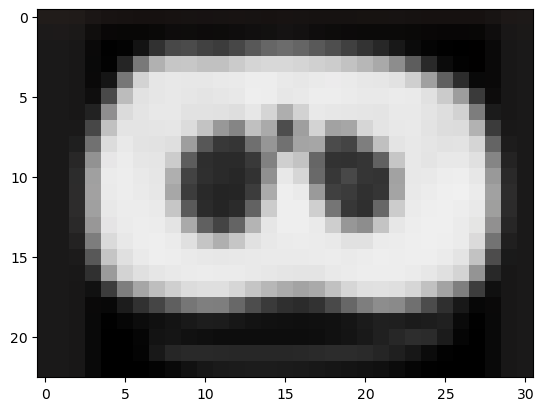

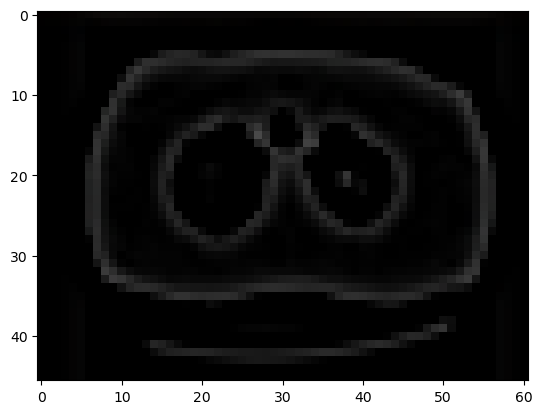

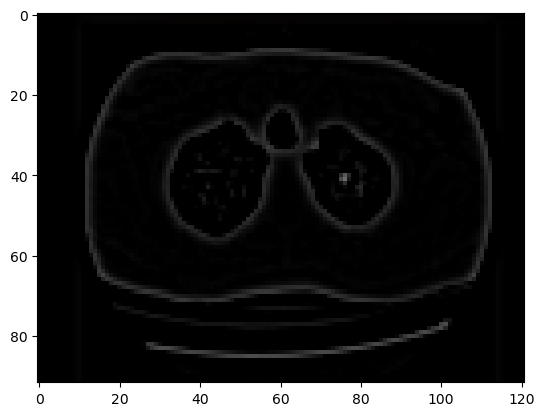

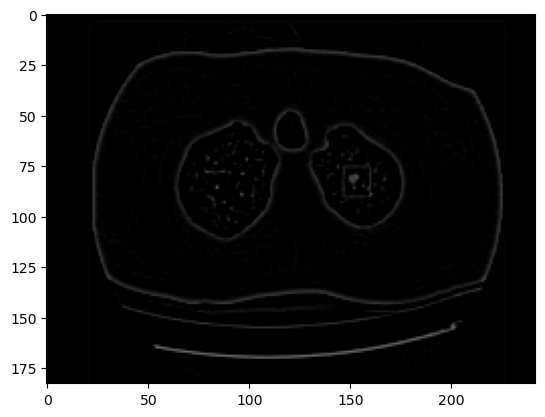

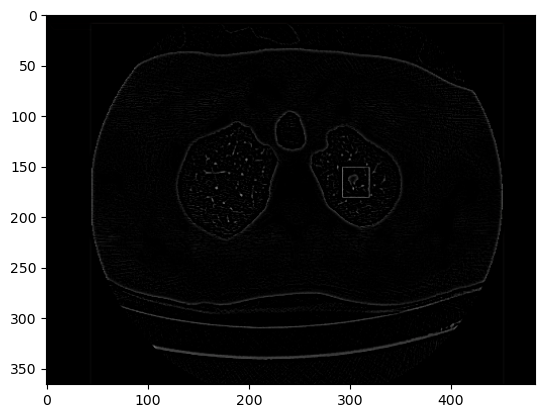

In [7]:
lower = img.copy()
gaussian_pyramid = [lower]
#creating a gaussian pyramid
for i in range(4):
    lower = cv2.pyrDown(lower)
    gaussian_pyramid.append(lower)
#last level same in both laplacian and gauss
laplacian_top = gaussian_pyramid[-1]


#creating laplacian pyramid
laplacian_pyramid = [laplacian_top]
for i in range(4,0,-1):
    size = (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
    laplacian_pyramid.append(laplacian)

#displaying laplacian pyramid
for lap_pyr in laplacian_pyramid:
    plt.imshow(lap_pyr,cmap='gray')
    plt.show()